# Practical Assignment I: Multilayer Perceptrons

Multilayer perceptron (MLP) is a fully connected, feedforward neural network architecture. It consists of one input layer, one or more hidden layers, and one output layer. Each layer consists of units (also called neurons, or nodes).

Each unit is connected to every unit in a neighboring layer, hence fully connected. This is why in Keras these layers are called `Dense`. Information flows from left to right, hence feedforward.

<img src="https://edirlei.com/images/nn1.png" width="800">

**Learning objectives:**

At the end of this DataLab, you will be able to build MLPs using Keras for the following problem types:

 - Regression
 - Binary classification
 - Multi-class classification
 - Multi-label classification
 
For each type, you will be given a suitable dataset. Then you will:

 - Pre-process the data if needed
 - Create a `Sequential()` model
 - Compile the model by defining a loss function, an optimizer and the metrics to be calculated
 - Train the model using the `fit()` method
 - Test the model using the `predict()` and `evaluate()` methods
 
 
 **Notebook contents:**
 
 1. Regression
 2. Binary classification
 3. Multi-class classification
 4. Multi-label classification

**Packages:**

Let's start by importing the basic packages required for this DataLab:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Regression

The goal of a regression task is to predict a continuous outcome variable (dependent variable) based on one or more predictor variables (independent variables).

**The dataset**

In this task, you will use the diabetes dataset provided by `scikit-learn`.

Please read the dataset documentation before you start:

https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset

Now let's load the data and display some samples from the dataset:

In [2]:
from sklearn import datasets
import numpy as np
diabetes = datasets.load_diabetes()
X = np.array(diabetes.data)
y = np.array(diabetes.target).reshape((-1, 1))
print(y.shape)
names = diabetes.feature_names
print(names)
Xy_combined = np.concatenate((X, y), axis=1)
df = pd.DataFrame(Xy_combined,
                  columns=names + ['disease progression'])
df.head()

(442, 1)
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,disease progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


Let's split the dataset into a training set and a testing set using function ``train_test_split``:

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    random_state=0)

Now we can visualize the dimensions of the sets:

In [4]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((296, 10), (146, 10), (296, 1), (146, 1))

**Task 1.1**
Build an MLP suitable for the diabetes dataset. Use a `Sequential()` model and `Dense` layers from Keras. You are free to pick any number of hidden layers and any number of units per layer as long as it works.  Use suitable activation functions.

In [47]:
# YOUR CODE HERE #
import tensorflow as tf

keras = tf.keras
from keras import Sequential
from keras import  layers

model = Sequential([
    layers.Dense(units = 256 , activation='relu'),
layers.Dense(units=64 , activation='relu'),
layers.Dense(units = 16 , activation='relu'),

layers.Dense(units = 1  , activation='linear')

])






**Task 1.2**
Using `model.compile()`, compile the model. Select a suitable optimizer and a suitable loss function. Also include a metric or metrics.

In [48]:
# YOUR CODE HERE #
model.compile(optimizer='Adam' , loss = 'mse' , metrics=['mae'])

**Task 1.3** Using `model.fit()` Train the model on X_train, y_train and use X_test, y_test as validation data. Pick a suitable number of epochs and batch size.

In [49]:
# YOUR CODE HERE #
model.fit(X_train,y_train,  batch_size=24 , epochs = 50 , validation_data=(X_test, y_test) )

Epoch 1/50
13/13 [==============================] - 1s 18ms/step - loss: 29102.9297 - mae: 151.1569 - val_loss: 28860.1445 - val_mae: 153.5975
Epoch 2/50
13/13 [==============================] - 0s 5ms/step - loss: 28946.6562 - mae: 150.6460 - val_loss: 28580.2227 - val_mae: 152.7027
Epoch 3/50
13/13 [==============================] - 0s 6ms/step - loss: 28499.7812 - mae: 149.2172 - val_loss: 27850.4863 - val_mae: 150.3561
Epoch 4/50
13/13 [==============================] - 0s 6ms/step - loss: 27449.3984 - mae: 145.7506 - val_loss: 26215.5039 - val_mae: 144.9958
Epoch 5/50
13/13 [==============================] - 0s 5ms/step - loss: 25219.9102 - mae: 138.2879 - val_loss: 23102.8691 - val_mae: 134.2336
Epoch 6/50
13/13 [==============================] - 0s 6ms/step - loss: 21316.5059 - mae: 124.0975 - val_loss: 18053.8496 - val_mae: 114.7451
Epoch 7/50
13/13 [==============================] - 0s 5ms/step - loss: 15780.5928 - mae: 100.7598 - val_loss: 11563.5928 - val_mae: 86.0502
Epoch 

**Task 1.4** Evaluate the model using `model.evaluate()`.

In [50]:
# YOUR CODE HERE #
model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 2ms/step - loss: 3091.7090 - mae: 44.3890


[3091.708984375, 44.38899230957031]

In [51]:
y_pred = model.predict(X_test)

5/5 [==============================] - 0s 2ms/step


In [52]:
X_test.shape

(146, 10)

In [53]:
y_pred.shape,y_test.shape

((146, 1), (146, 1))

**Task 1.5** Get predictions on `X_test`. Plot `y_test` vs. predictions. On the same plot, plot a $x = y$ line. Think about what this line represents.

(146, 1) (146, 1)


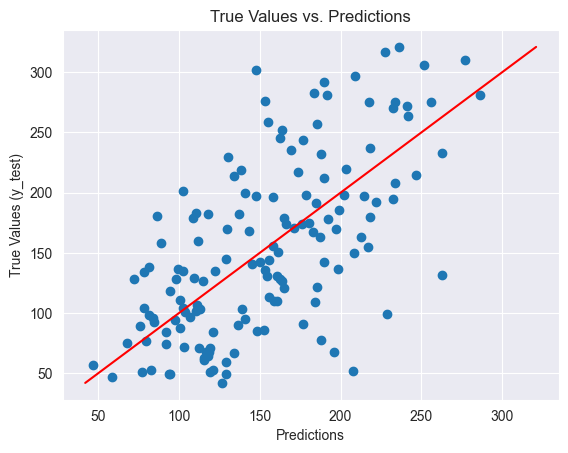

In [54]:
# YOUR CODE HERE #
print(y_pred.shape , y_test.shape)



fig, ax = plt.subplots()

plt.ylabel('True Values (y_test)')
plt.xlabel('Predictions')
plt.title('True Values vs. Predictions')

ax.scatter(y_pred, y_test.reshape(-1,1 ))

ax.plot([min(y_test) , max(y_test)] , [min(y_test), max(y_test)] , color='red')


plt.show()

## 2. Binary Classification

Binary classification is a type of classification where a model is trained to categorize data points into one of two categories. 

**The dataset**

In this task, you will use the breast cancer dataset provided by `scikit-learn`.

Please read the dataset documentation before you start:

https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-dataset

Now let's load the data and display some samples from the dataset:

In [56]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
names = list(cancer.feature_names)
Xy_combined = np.concatenate((X, y[:, np.newaxis]), axis=1)
df = pd.DataFrame(Xy_combined,
                  columns=names + ['Benign'])
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Benign
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


Let's split the dataset into a training set and a testing set using function ``train_test_split``:

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    random_state=0)

Now we can visualize the dimensions of the sets:

In [58]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((381, 30), (188, 30), (381,), (188,))

**Task 2.1**
Build an MLP suitable for the breast cancer dataset. Use a `Sequential()` model and `Dense` layers from Keras. You are free to pick any number of hidden layers and any number of units per layer as long as it works. Use suitable activation functions.

In [60]:
model = Sequential(
    [layers.Dense(256, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')],
)




**Task 2.2**
Compile the model by selecting a suitable optimizer and a suitable loss function. Also include a metric or metrics.

In [61]:
# YOUR CODE HERE #
model.compile(optimizer='adam', loss='binary_crossentropy' , metrics=['accuracy'])

**Task 2.3**
Train the model on X_train, y_train and use X_test, y_test as validation data. Pick a suitable number of epochs and batch size.

In [116]:
model.fit(X_train, y_train , validation_data=(X_test, y_test) ,epochs = 50 , batch_size=32)

Epoch 1/50
12/12 [==============================] - 0s 39ms/step - loss: 0.2475 - accuracy: 0.9213 - val_loss: 0.2714 - val_accuracy: 0.8883
Epoch 2/50
12/12 [==============================] - 0s 6ms/step - loss: 0.2243 - accuracy: 0.9186 - val_loss: 0.1522 - val_accuracy: 0.9574
Epoch 3/50
12/12 [==============================] - 0s 6ms/step - loss: 0.2107 - accuracy: 0.9239 - val_loss: 0.1394 - val_accuracy: 0.9521
Epoch 4/50
12/12 [==============================] - 0s 6ms/step - loss: 0.2602 - accuracy: 0.8924 - val_loss: 0.1361 - val_accuracy: 0.9468
Epoch 5/50
12/12 [==============================] - 0s 6ms/step - loss: 0.5825 - accuracy: 0.8399 - val_loss: 0.2263 - val_accuracy: 0.9096
Epoch 6/50
12/12 [==============================] - 0s 6ms/step - loss: 0.7472 - accuracy: 0.7979 - val_loss: 0.7342 - val_accuracy: 0.8830
Epoch 7/50
12/12 [==============================] - 0s 6ms/step - loss: 0.5418 - accuracy: 0.8766 - val_loss: 0.5188 - val_accuracy: 0.9149
Epoch 8/50
12/12 [=

**Task 2.4**
Evaluate the model using `model.evaluate()`.

In [117]:
model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 2ms/step - loss: 0.2691 - accuracy: 0.9043


[0.2690914571285248, 0.9042553305625916]

**Task 2.5**
Plot the confusion matrix for your trained model on the test set.

In [118]:
# YOUR CODE HERE #

from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)


6/6 [==============================] - 0s 1ms/step


In [119]:
y_pred.shape, y_test.shape

((188, 1), (188, 1))

In [120]:
y_pred.dtype, y_test.dtype

(dtype('float32'), dtype('int32'))

In [121]:
import math


y_pred  , y_test   = np.round(y_pred),  np.round(y_test)

In [122]:
y_test = y_test.reshape(-1, 1)

In [123]:
y_test.shape

(188, 1)

In [124]:
y_pred.shape

(188, 1)

In [125]:
import seaborn as sns

mtrx = confusion_matrix(y_test, y_pred)

mtrx

array([[ 49,  18],
       [  0, 121]], dtype=int64)

<Axes: >

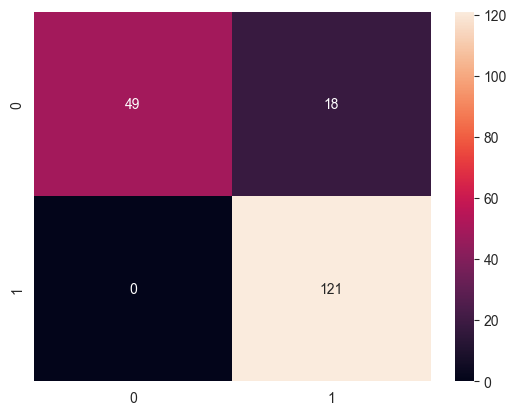

In [126]:
sns.heatmap(mtrx, annot=True , fmt='d')

## 3. Multi-class Classification

Multi-class classification is a task where an instance or sample can be classified into more than two categories or classes.

**The dataset**

In this task, you will use the MNIST dataset provided by `keras`.

Please read the dataset documentation before you start:

https://keras.io/api/datasets/mnist/

Now let's load the dataset (notice that function ``mnist.load_data`` automatizally splits the data into a training set and a testing set):

In [127]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

To visualize how the samples look like, we can display a random sample from the dataset:

Label: 3


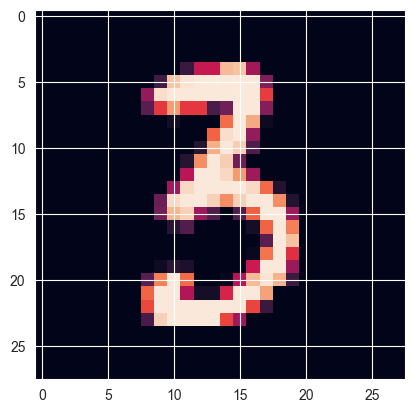

In [129]:
# View random digit
index = np.random.randint(0, 60000)
plt.imshow(X_train[index])
print('Label:', y_train[index])

We can also visualize the dimensions of the sets:

In [130]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

**Task 3.1**
The MLP architecture you will build is given below. 784 input units, two hidden layers with 30 units each, one output layer with 10 units. 

<img src="https://edirlei.com/images/nn2.png" width="500">

**Important**: Notice that X_train/X_test shape and the input layer shape of the network are not compatible (X_train shape is ``(, 28, 28)``, but the expected input layer shape is ``(, 784)``). Similarly, y_train/y_test and the output layer shape of the network, are not compatible (y_train shape is ``(,1)``, but the expected output layer shape is ``(,10)``). To solve this problem, you need to preprocess the data to make them compatible. Here are some hints on how to solve this problem:

- You can solve the incompatibility of the input by using the [reshape function](https://numpy.org/doc/stable/reference/generated/numpy.reshape.html).
- You can solve the incompatibility of the output by using one-hot encoding through the [to_categorical function](https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical).



In [134]:
# YOUR CODE HERE #
X_train,X_test  = X_train.reshape(-1, 784)  / 255 , X_test.reshape(-1,784) / 255


In [140]:
y_train

array([[5],
       [0],
       [4],
       ...,
       [5],
       [6],
       [8]], dtype=uint8)

In [137]:
y_train,y_test = y_train.reshape(-1, 1 ) , y_test.reshape(-1, 1)

In [138]:
X_train.shape, X_test.shape ,y_train.shape, y_test.shape

((60000, 784), (10000, 784), (60000, 1), (10000, 1))

**Task 3.2**
Build an MLP suitable for the MNIST dataset. Use a `Sequential()` model and `Dense` layers from Keras. Build the architecture shown in Task 3.1 Use suitable activation functions.

In [139]:
# YOUR CODE HERE #
model = Sequential([
    layers.Dense(units = 784 , activation='relu' ),
    layers.Dense(units = 30 , activation='relu'),
    layers.Dense(30,  activation='relu'),
    layers.Dense(10,  activation='softmax')
])

**Task 3.3**
Compile the model by selecting a suitable optimizer and a suitable loss function. Also include a metric or metrics.

In [141]:
# YOUR CODE HERE #
model.compile(optimizer='adam' , loss='sparse_categorical_crossentropy' , metrics=['accuracy'])

**Task 3.4**
Train the model on X_train, y_train and use X_test, y_test as validation data. Pick a suitable number of epochs and batch size.

In [142]:
# YOUR CODE HERE #
model.fit(X_train, y_train , validation_data=(X_test, y_test) , epochs = 20 , batch_size=32)

Epoch 1/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2159 - accuracy: 0.9363 - val_loss: 0.1107 - val_accuracy: 0.9655
Epoch 2/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0868 - accuracy: 0.9733 - val_loss: 0.0807 - val_accuracy: 0.9750
Epoch 3/20
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0590 - accuracy: 0.9812 - val_loss: 0.1163 - val_accuracy: 0.9629
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0455 - accuracy: 0.9855 - val_loss: 0.0755 - val_accuracy: 0.9781
Epoch 5/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0343 - accuracy: 0.9889 - val_loss: 0.0735 - val_accuracy: 0.9791
Epoch 6/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0296 - accuracy: 0.9904 - val_loss: 0.0926 - val_accuracy: 0.9766
Epoch 7/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0244 - accuracy: 0.9924 - val_loss: 0.0757 - val_accuracy

**Task 3.5**
Evaluate the model using `model.evaluate()`.

In [143]:
# YOUR CODE HERE #
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0979 - accuracy: 0.9835


[0.09788033366203308, 0.9835000038146973]

**Challenge:**
Find the worst prediction. If you struggle with this task, try it later.

In [ ]:
# YOUR CODE HERE #

## 4. Multi-label Classification

Multi-label classification is a type of classification where an instance (or data point) can be classified into multiple classes or categories simultaneously. This is different from multi-class classification, where each instance is assigned to only one class.

**The dataset**

In this task you will use a simulated dataset.

You are given 4 random integers ($x_1, x_2, x_3, x_4$) between -5 and 5 ($x_i \in [-5, 5]$). Your task is to develop an MLP that predicts parity and sign of the product of these four numbers ($x_1 \times x_2 \times x_3 \times x_4$).

**Definitions**

In mathematics, parity is the property of an integer of whether it is even or odd.

In mathematics, the sign of a real number is its property of being either positive, negative, or zero.

**Example**

$x_1=-1, x_2=1, x_3=-3, x_4=-5$

$ product = x_1 \times x_2 \times x_3 \times x_4 = -15$

parity of -15 is `odd` and sign of -15 is `negative`.

**Columns**

$x_i$: Integers between -5 (inclusive) and 5 (inclusive).

Parity column: $x_1 \times x_2 \times x_3 \times x_4$ is even (0) or odd (1).

Sign column: $x_1 \times x_2 \times x_3 \times x_4$ is negative (-1), or zero (0) or positive (1).

|$x_1$|$x_2$|$x_3$|$x_4$|$Parity$|$Sign$|
|:--|:--|:--|:--|:--|:--|
|-2|-4|-1|1|0|-1|
|-3|5|-3|3|1|1|
|-4|-2|5|3|0|1|
|-4|0|-5|0|0|0|
|1|1|2|-4|0|-1|
|-1|1|-3|-5|1|-1|


Based on these definitions, we can write a function to generate a simulated dataset:

In [6]:
import numpy as np
import pandas as pd
def simulator(n):
    
    # x_i numbers with shape (n, 4)
    X = np.random.randint(-5, 6, size=(n, 4))

    # product of 4 numbers for each row
    # this will be used to calculate labels
    # but this won't be part of the dataset
    product = np.prod(X, axis=1)

    # label 1
    parity_col = product % 2
    parity_col = parity_col.reshape(-1, 1)

    # label 2
    pos = (product > 0)*1
    neg = (product < 0)*-1
    zero = (product == 0)*0
    sign_col = pos + neg + zero
    sign_col = sign_col.reshape(-1, 1)

    # concatenate columns to create the dataset
    dataset = np.concatenate((X, parity_col, sign_col), axis=1)
    
    return dataset

Now we can create the dataset:

In [7]:
dataset = simulator(n=10000)

To see how the data look like, we can display some samples from the dataset:

In [8]:
df = pd.DataFrame(dataset, columns=['x_1', 'x_2', 'x_3', 'x_4', 'Parity', 'Sign'])
df.head(10)

,x_1,x_2,x_3,x_4,Parity,Sign
0,2,0,3,-5,0,0
1,2,-1,-5,5,0,1
2,2,5,0,5,0,0
3,3,5,5,-4,0,-1
4,5,5,-5,3,1,-1
5,0,5,-5,-2,0,0
6,-2,-1,-1,4,0,-1
7,-4,0,3,-5,0,0
8,2,-4,2,4,0,-1
9,-4,1,-3,-2,0,-1


**Task 4.1**
Use the numpy array `dataset` to create `X` and `y`. Preprocess the data if needed.

In [15]:
# YOUR CODE HERE #
X,  y  = df.iloc[:, :-2 ] , df.iloc[:,-2:]
X.shape, y.shape 

((10000, 4), (10000, 2))

After preprocessing the data, we can split the dataset into a training set and a testing set using function ``train_test_split``:

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    random_state=0)

Then we can visualize the dimensions of the sets:

In [17]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((6700, 4), (6700, 2), (3300, 4), (3300, 2))

In [18]:
y_train

,Parity,Sign
6596,0,1
1292,0,0
2011,1,1
4957,0,-1
5164,0,0
...,...,...
9225,0,1
4859,0,0
3264,0,1
9845,0,-1


**Task 4.2**
Build a MLP suitable for this simulated dataset. Use a `Sequential()` model and `Dense` layers from Keras. Use suitable activation functions.

In [33]:
# YOUR CODE HERE #
import tensorflow as tf
keras = tf.keras

from keras import Sequential
from keras.layers import Dense
model = Sequential([

    Dense(64 , activation='relu'),
    Dense(32 , activation='relu'),
    Dense(2 , activation='sigmoid'),
    
])

**Task 4.3**
Compile the model by selecting a suitable optimizer and a suitable loss function. Also include a metric or metrics.

In [34]:
# YOUR CODE HERE #
model.compile(optimizer='adam' , loss='binary_crossentropy' , metrics=['accuracy'])

**Task 4.4**
Train the model on X_train, y_train and use X_test, y_test as validation data. Pick a suitable number of epochs and batch size.

In [35]:
# YOUR CODE HERE #

model.fit(X_train,y_train  , validation_data = (X_test, y_test) , epochs = 15 , batch_size= 64 )

Epoch 1/15
105/105 [==============================] - 1s 4ms/step - loss: 0.2520 - accuracy: 0.6316 - val_loss: 0.0648 - val_accuracy: 0.6948
Epoch 2/15
105/105 [==============================] - 0s 3ms/step - loss: -0.1827 - accuracy: 0.7136 - val_loss: -0.3496 - val_accuracy: 0.7133
Epoch 3/15
105/105 [==============================] - 0s 3ms/step - loss: -0.9134 - accuracy: 0.7276 - val_loss: -1.3559 - val_accuracy: 0.7267
Epoch 4/15
105/105 [==============================] - 0s 3ms/step - loss: -2.6987 - accuracy: 0.7272 - val_loss: -3.7285 - val_accuracy: 0.7115
Epoch 5/15
105/105 [==============================] - 0s 2ms/step - loss: -6.5809 - accuracy: 0.7185 - val_loss: -8.5756 - val_accuracy: 0.7052
Epoch 6/15
105/105 [==============================] - 0s 2ms/step - loss: -13.6399 - accuracy: 0.7216 - val_loss: -16.3995 - val_accuracy: 0.7000
Epoch 7/15
105/105 [==============================] - 0s 2ms/step - loss: -24.7399 - accuracy: 0.7121 - val_loss: -28.8059 - val_accurac

In [36]:
model.evaluate(X_test,y_test)

104/104 [==============================] - 0s 2ms/step - loss: -320.7565 - accuracy: 0.7079


[-320.7564697265625, 0.7078787684440613]